### Get set up

In [2]:
# IMPORTS
import os
import pandas as pd
import numpy as np
from utils.load_utils import import_brava_data, get_import_params
from utils.data_utils import calculate_fft, calculate_tau_ami, calculate_best_m_tau, calculate_lyapunov_exponents
from utils.dynsys_utils import calc_dim_Cao1997
import matplotlib.pyplot as plt

# JUPYTER
%matplotlib widget
%reload_ext autoreload
%autoreload 2

# FILENAMES
main_dir = os.getcwd()
data_dir = main_dir + '/data'
exp_name = 'b1383'
filename = data_dir + '/' + exp_name + '.txt'
picklename = data_dir + '/' + exp_name + '.pickle'

### Import data

Importing BRAVA data...
...reading pickle...
... data imported
79640
      V-LVDT    H-LVDT  SHEAR STRESS  NORMAL STRESS  ON BOARD LVDT  \
0 -15.131615  5.226966      9.630810       7.497468    6249.136715   
1 -31.657716  6.178788      9.871680       7.497285    8772.464915   
2 -27.720415  5.952087      9.811924       7.497096    8172.364223   
3 -30.048910  6.086069      9.843103       7.497221    8527.502575   
4 -28.391140  5.990695      9.823957       7.497150    8275.512776   

   V Load aux         TIME        Record  NORMALISED SHEAR  
0    0.475953  1940.000000  2.810262e+06          0.654709  
1    0.493501  1940.050001  5.029166e+05          0.993747  
2    0.489146  1940.100001  1.052594e+06          0.909642  
3    0.491443  1940.150002  7.274995e+05          0.953531  
4    0.489953  1940.200002  9.589191e+05          0.926587  


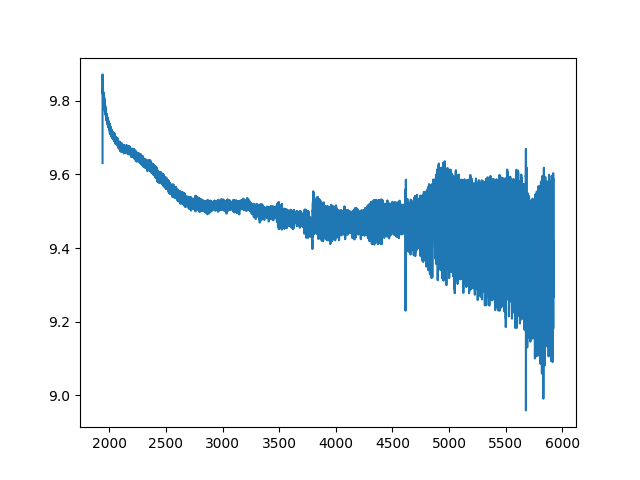

In [3]:
# IMPORT PARAMS
import_params = get_import_params(exp_name)
import_params["downsample_factor"] = 50

# IMPORT
data = import_brava_data(filename, picklename, import_params)
print("... data imported")
print(len(data))

# HAVE A LOOK
print(data.head())
plt.plot(data["TIME"], data["SHEAR STRESS"])
plt.show()

### Generate windows

In [4]:
win_length = 2000
win_offset = 1000
start_offset = 10
num_wins = (len(data) - win_length - start_offset) // win_offset
wins = np.empty((num_wins, 2), dtype=np.int_)
for i, _ in enumerate(wins):
    wins[i] = [i*win_offset + start_offset, i*win_offset + start_offset + win_length]
print(wins[0])

[  10 2010]


# The loop

WINDOW  1 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1


m = 5; Calculation time: 27.73 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 11.71 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 18.82 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 27.03 s

Best m = 5, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.48it/s]


Lyapunov Exponents: [ 0.08413441 -0.04046398 -0.19243135 -0.36801019 -0.76031844]
Kaplan-Yorke dimension: 3

____________________

WINDOW  2 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 6; Calculation time: 5.99 s

Loop 2/4: tau = 5
m = 7; Calculation time: 2.52 s

Loop 3/4: tau = 20
m = 6; Calculation time: 20.35 s

Loop 4/4: tau = 50
m = 7; Calculation time: 5.12 s

Best m = 6, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.22it/s]


Lyapunov Exponents: [ 0.12904693  0.01862726 -0.10051355 -0.21010174 -0.35175168 -0.66057259]
Kaplan-Yorke dimension: 4

____________________

WINDOW  3 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 2.38 s

Loop 2/4: tau = 5
m = 8; Calculation time: 1.60 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 2.74 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 2.21 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:07<00:00, 13.85it/s]


Lyapunov Exponents: [ 0.13043481  0.02708308 -0.02815655 -0.07485984 -0.1301968  -0.20984556
 -0.32761151 -0.7169497 ]
Kaplan-Yorke dimension: 5

____________________

WINDOW  4 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.42 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.14 s

Best m = nan, tau=nan

____________________

WINDOW  5 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.59 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.46 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.35 s

Loop 4/4: tau = 50
E2 ~ const.: sto

100%|██████████| 100/100 [00:07<00:00, 13.90it/s]


Lyapunov Exponents: [ 0.14173699  0.053463   -0.0218272  -0.06663819 -0.11124908 -0.18306168
 -0.3106792  -0.70463921]
Kaplan-Yorke dimension: 5

____________________

WINDOW  6 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 6; Calculation time: 1.57 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.57 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.24 s

Best m = 6, tau=1


100%|██████████| 100/100 [00:06<00:00, 15.11it/s]


Lyapunov Exponents: [ 0.17182113  0.01857356 -0.08110775 -0.16957401 -0.30919866 -0.67457203]
Kaplan-Yorke dimension: 4

____________________

WINDOW  7 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.42 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.42 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.43 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.84it/s]


Lyapunov Exponents: [ 0.13247341  0.04584199 -0.02340826 -0.06533661 -0.1135297  -0.17889971
 -0.30295875 -0.70838966]
Kaplan-Yorke dimension: 5

____________________

WINDOW  8 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.43 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.07 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


Lyapunov Exponents: [ 0.16236417  0.03728037 -0.03670704 -0.11352957 -0.16704581 -0.32500802
 -0.68759007]
Kaplan-Yorke dimension: 5

____________________

WINDOW  9 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.63 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.60 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.76it/s]


Lyapunov Exponents: [ 0.1382272   0.04351061 -0.01878971 -0.06208454 -0.12998717 -0.19575042
 -0.32856349 -0.65772567]
Kaplan-Yorke dimension: 5

____________________

WINDOW  10 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.46 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.65 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.55 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.14 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 15.12it/s]


Lyapunov Exponents: [ 0.14476491  0.02981992 -0.03708347 -0.09571221 -0.19533687 -0.32431792
 -0.68077777]
Kaplan-Yorke dimension: 5

____________________

WINDOW  11 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.48 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 15.06it/s]


Lyapunov Exponents: [ 0.14729053  0.03588356 -0.03552554 -0.09539011 -0.19301031 -0.33186247
 -0.69257092]
Kaplan-Yorke dimension: 5

____________________

WINDOW  12 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.42 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.27 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


Lyapunov Exponents: [ 0.15391578  0.03743446 -0.0382745  -0.10808802 -0.20723571 -0.31856635
 -0.71353116]
Kaplan-Yorke dimension: 5

____________________

WINDOW  13 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.49 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.17 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.95it/s]


Lyapunov Exponents: [ 0.15777642  0.03878043 -0.03095171 -0.10697138 -0.19332754 -0.32626825
 -0.73054089]
Kaplan-Yorke dimension: 5

____________________

WINDOW  14 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.45 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.40 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.12 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


Lyapunov Exponents: [ 0.14515841  0.03917904 -0.02953977 -0.1111522  -0.17730279 -0.31320079
 -0.72869613]
Kaplan-Yorke dimension: 5

____________________

WINDOW  15 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.27 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.11 s

Best m = nan, tau=nan

____________________

WINDOW  16 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.29 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.22 s

Loop 

100%|██████████| 100/100 [00:06<00:00, 14.58it/s]


Lyapunov Exponents: [ 0.13648575  0.04216454 -0.01823223 -0.0609579  -0.11675203 -0.18315113
 -0.31895587 -0.63856883]
Kaplan-Yorke dimension: 5

____________________

WINDOW  18 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.41 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.35 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.24 s

Best m = nan, tau=nan

____________________

WINDOW  19 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.41 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1

100%|██████████| 100/100 [00:07<00:00, 14.22it/s]


Lyapunov Exponents: [ 0.1545307   0.04825492 -0.00868361 -0.06789695 -0.12268315 -0.20039057
 -0.2962929  -0.68361964]
Kaplan-Yorke dimension: 6

____________________

WINDOW  22 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.34 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.44 s

Loop 3/4: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.43 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.27 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


Lyapunov Exponents: [ 0.14424508  0.04141567 -0.03968753 -0.11256528 -0.20718751 -0.3237023
 -0.67819406]
Kaplan-Yorke dimension: 5

____________________

WINDOW  23 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.38 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.46 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.17 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.25it/s]


Lyapunov Exponents: [ 0.17526995  0.02966602 -0.03401872 -0.10519311 -0.19424863 -0.31866178
 -0.69896871]
Kaplan-Yorke dimension: 5

____________________

WINDOW  24 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.41 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.42 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.53 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.37 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


Lyapunov Exponents: [ 0.25757833  0.08295915 -0.08394043 -0.27326786 -0.46607584 -0.82999158
 -1.52177345]
Kaplan-Yorke dimension: 4

____________________

WINDOW  25 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.40 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.70 s

Loop 4/4: tau = 50
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:07<00:00, 14.24it/s]


Lyapunov Exponents: [ 0.33660807  0.12407916 -0.04550435 -0.20210643 -0.43903919 -0.7580905
 -1.49708159]
Kaplan-Yorke dimension: 5

____________________

WINDOW  26 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.58 s

Loop 3/4: tau = 20
m = 7; Calculation time: 2.03 s

Loop 4/4: tau = 50
m = 8; Calculation time: 2.14 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.38it/s]


Lyapunov Exponents: [ 0.25291671  0.0676472  -0.08900829 -0.29595999 -0.49050358 -0.86051188
 -1.56400697]
Kaplan-Yorke dimension: 4

____________________

WINDOW  27 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.31 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.48 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.66 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.46 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:07<00:00, 14.28it/s]


Lyapunov Exponents: [ 0.24954679  0.08709959 -0.07632851 -0.25486839 -0.49639679 -0.81911183
 -1.52099917]
Kaplan-Yorke dimension: 5

____________________

WINDOW  28 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.50 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.63 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.55 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.36it/s]


Lyapunov Exponents: [ 0.21318587  0.0525982  -0.10804785 -0.35041473 -0.57263329 -0.93586845
 -1.68686921]
Kaplan-Yorke dimension: 4

____________________

WINDOW  29 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.31 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.45 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.43 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.18 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


Lyapunov Exponents: [ 0.16227439  0.03707815 -0.04552021 -0.11324976 -0.2177472  -0.36659891
 -0.69897464]
Kaplan-Yorke dimension: 5

____________________

WINDOW  30 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.33 s

Loop 2/4: tau = 5
m = 8; Calculation time: 1.47 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.73 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.47 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.35it/s]


Lyapunov Exponents: [ 0.15683895  0.03796778 -0.04492246 -0.11168012 -0.20687726 -0.32528285
 -0.70537135]
Kaplan-Yorke dimension: 5

____________________

WINDOW  31 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.44 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.69 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.43 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.32it/s]


Lyapunov Exponents: [ 1.51189195e-01  8.52379018e-05 -1.66729156e-01 -3.94755101e-01
 -6.57354990e-01 -9.91026454e-01 -1.72856318e+00]
Kaplan-Yorke dimension: 3

____________________

WINDOW  32 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.35 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.44 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.35 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.31it/s]


Lyapunov Exponents: [ 0.15969493  0.03636432 -0.11301516 -0.34203789 -0.59986313 -0.93915372
 -1.6996518 ]
Kaplan-Yorke dimension: 4

____________________

WINDOW  33 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.35 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.37 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.43 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.38 s

Best m = 7, tau=50


100%|██████████| 100/100 [00:07<00:00, 14.26it/s]


Lyapunov Exponents: [ 0.13003364  0.0133811  -0.10892567 -0.3109328  -0.52238636 -0.89086341
 -1.5797157 ]
Kaplan-Yorke dimension: 4

____________________

WINDOW  34 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.44 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.68 s

Loop 4/4: tau = 50
m = 9; Calculation time: 1.50 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Lyapunov Exponents: [ 0.23999449  0.05949776 -0.11396364 -0.29366458 -0.50148785 -0.84437786
 -1.59092662]
Kaplan-Yorke dimension: 4

____________________

WINDOW  35 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.33 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.43 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.45 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.38 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Lyapunov Exponents: [ 0.14502916  0.04346641 -0.04587923 -0.11217181 -0.21148137 -0.32213501
 -0.67385355]
Kaplan-Yorke dimension: 5

____________________

WINDOW  36 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.33 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.44 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.45 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.29 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.21it/s]


Lyapunov Exponents: [ 0.10180698  0.0281872  -0.02395395 -0.08225624 -0.13489944 -0.21105036
 -0.34956293 -0.71696734]
Kaplan-Yorke dimension: 5

____________________

WINDOW  37 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 2.33 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 2.67 s

Loop 3/4: tau = 20
m = 6; Calculation time: 4.77 s

Loop 4/4: tau = 50
m = 6; Calculation time: 5.63 s

Best m = 6, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.52it/s]


Lyapunov Exponents: [ 0.11451613 -0.05708849 -0.35000329 -0.63163832 -0.99420771 -1.71485213]
Kaplan-Yorke dimension: 3

____________________

WINDOW  38 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.54 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.53 s

Loop 3/4: tau = 20
m = 8; Calculation time: 2.05 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.65 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


Lyapunov Exponents: [ 0.11135824  0.01228328 -0.04117508 -0.11344295 -0.20635472 -0.33867038
 -0.72076983]
Kaplan-Yorke dimension: 4

____________________

WINDOW  39 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.31 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.40 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.36 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.21 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.33it/s]


Lyapunov Exponents: [ 0.2725506   0.04571435 -0.11055711 -0.31636283 -0.54510371 -0.90727695
 -1.62182561]
Kaplan-Yorke dimension: 4

____________________

WINDOW  40 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.34 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.20 s

Best m = 6, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


Lyapunov Exponents: [ 0.3048457   0.03005499 -0.25207119 -0.49255279 -0.83342596 -1.59019518]
Kaplan-Yorke dimension: 4

____________________

WINDOW  41 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.40 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.20 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


Lyapunov Exponents: [ 0.10927915  0.03962806 -0.0255974  -0.06488389 -0.13499747 -0.199742
 -0.33781102 -0.71420951]
Kaplan-Yorke dimension: 5

____________________

WINDOW  42 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.35 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.35 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.23 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Lyapunov Exponents: [ 0.32047441  0.11266071 -0.07143188 -0.28233587 -0.5255366  -0.85724872
 -1.64314262]
Kaplan-Yorke dimension: 5

____________________

WINDOW  43 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.35 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.34 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.13 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.33it/s]


Lyapunov Exponents: [ 0.13248154  0.03643911 -0.04245183 -0.11112108 -0.19914745 -0.34350179
 -0.70141892]
Kaplan-Yorke dimension: 5

____________________

WINDOW  44 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.34 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.21 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.24it/s]


Lyapunov Exponents: [ 0.13075122  0.01774116 -0.03990306 -0.10967378 -0.19432821 -0.35133384
 -0.73073913]
Kaplan-Yorke dimension: 4

____________________

WINDOW  45 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.40 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.37 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.12 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.23it/s]


Lyapunov Exponents: [ 0.12854398  0.01739591 -0.03683285 -0.12192342 -0.19175393 -0.32054353
 -0.71211302]
Kaplan-Yorke dimension: 4

____________________

WINDOW  46 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.40 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.31 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.19 s

Best m = 7, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


Lyapunov Exponents: [ 0.38972732  0.10176021 -0.10542355 -0.2871472  -0.53468816 -0.87367435
 -1.57845986]
Kaplan-Yorke dimension: 5

____________________

WINDOW  47 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.37 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.26 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.31it/s]


Lyapunov Exponents: [ 0.24242324  0.08214318 -0.11878416 -0.35641725 -0.57453168 -0.92230992
 -1.63880673]
Kaplan-Yorke dimension: 4

____________________

WINDOW  48 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.31 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.13 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


Lyapunov Exponents: [ 0.26881053  0.03851381 -0.15667493 -0.34724403 -0.60595967 -0.95702623
 -1.6613209 ]
Kaplan-Yorke dimension: 4

____________________

WINDOW  49 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.34 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.38 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.31 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:07<00:00, 14.26it/s]


Lyapunov Exponents: [ 0.28483581  0.01487135 -0.15933808 -0.37420429 -0.61994531 -0.94683835
 -1.68830921]
Kaplan-Yorke dimension: 4

____________________

WINDOW  50 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.39 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.29 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.40it/s]


Lyapunov Exponents: [ 0.28449684  0.07056921 -0.09274202 -0.32003554 -0.55781569 -0.88798138
 -1.60049804]
Kaplan-Yorke dimension: 4

____________________

WINDOW  51 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.29 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.17 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Lyapunov Exponents: [ 0.34556642  0.114127   -0.10989339 -0.30691408 -0.53466822 -0.91119017
 -1.67160788]
Kaplan-Yorke dimension: 5

____________________

WINDOW  52 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 8; Calculation time: 1.38 s

Loop 2/4: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.27 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.17 s

Best m = 8, tau=1


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


Lyapunov Exponents: [ 0.11109473  0.03760703 -0.01834868 -0.08500931 -0.13283482 -0.20792572
 -0.33007154 -0.71974731]
Kaplan-Yorke dimension: 5

____________________

WINDOW  53 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.46 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.80 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.32 s

Best m = 7, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.39it/s]


Lyapunov Exponents: [ 0.23530654  0.02693832 -0.16990915 -0.37476654 -0.61941943 -0.92758825
 -1.72446025]
Kaplan-Yorke dimension: 4

____________________

WINDOW  54 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.31 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.49 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.62 s

Loop 4/4: tau = 50
m = 7; Calculation time: 2.21 s

Best m = 7, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


Lyapunov Exponents: [ 0.05708738 -0.02803684 -0.19918096 -0.36746636 -0.61420681 -0.94866115
 -1.73784473]
Kaplan-Yorke dimension: 3

____________________

WINDOW  55 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.34 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.31 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.65 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.30 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.34it/s]


Lyapunov Exponents: [ 0.08921417  0.0029376  -0.06018752 -0.14353758 -0.20738048 -0.3381638
 -0.73061114]
Kaplan-Yorke dimension: 4

____________________

WINDOW  56 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.32 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.25 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.23 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.08 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.43it/s]


Lyapunov Exponents: [ 0.06427212  0.00506728 -0.07606595 -0.12718653 -0.21798577 -0.31515839
 -0.67235681]
Kaplan-Yorke dimension: 3

____________________

WINDOW  57 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.32 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.24 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.22 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.11 s

Best m = 7, tau=1


100%|██████████| 100/100 [00:06<00:00, 14.39it/s]


Lyapunov Exponents: [ 0.06935217  0.0007444  -0.06544689 -0.12474558 -0.1994712  -0.32916911
 -0.70816804]
Kaplan-Yorke dimension: 4

____________________

WINDOW  58 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.66 s

Loop 3/4: tau = 20
m = 6; Calculation time: 2.64 s

Loop 4/4: tau = 50
m = 7; Calculation time: 2.39 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.34it/s]


Lyapunov Exponents: [ 0.1084261  -0.03007331 -0.25688529 -0.48500905 -0.68753194 -1.01303039
 -1.72959185]
Kaplan-Yorke dimension: 3

____________________

WINDOW  59 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.59 s

Loop 3/4: tau = 20
m = 7; Calculation time: 2.74 s

Loop 4/4: tau = 50
m = 7; Calculation time: 3.47 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


Lyapunov Exponents: [ 0.1959221  -0.00899246 -0.24369125 -0.48041012 -0.69349609 -1.04617487
 -1.76241312]
Kaplan-Yorke dimension: 3

____________________

WINDOW  60 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.36 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.33 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.38 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


Lyapunov Exponents: [ 0.10327697 -0.01286749 -0.24251349 -0.4987708  -0.75730724 -1.0555116
 -1.76873295]
Kaplan-Yorke dimension: 3

____________________

WINDOW  61 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.31 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.39 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.43 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.48 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.42it/s]


Lyapunov Exponents: [ 0.11716056 -0.0139323  -0.20394743 -0.46882691 -0.71964112 -1.06936572
 -1.80667818]
Kaplan-Yorke dimension: 3

____________________

WINDOW  62 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.39 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.48 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.77 s

Best m = 6, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.36it/s]


Lyapunov Exponents: [ 0.15325476 -0.0363898  -0.36337008 -0.6370834  -1.05612854 -1.79299617]
Kaplan-Yorke dimension: 3

____________________

WINDOW  63 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.42 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.33 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.36 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.37 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.29it/s]


Lyapunov Exponents: [ 0.13154712 -0.02392354 -0.23989359 -0.48621724 -0.72462743 -1.07370268
 -1.79584575]
Kaplan-Yorke dimension: 3

____________________

WINDOW  64 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.35 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.27 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.19 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.35it/s]


Lyapunov Exponents: [ 0.14500998 -0.01570258 -0.25889396 -0.48811525 -0.70146054 -1.06528061
 -1.80884285]
Kaplan-Yorke dimension: 3

____________________

WINDOW  65 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.32 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.35 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.24 s

Loop 4/4: tau = 50
m = 5; Calculation time: 1.27 s

Best m = 5, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.61it/s]


Lyapunov Exponents: [ 0.17009528 -0.10302528 -0.49363945 -0.91436998 -1.65830474]
Kaplan-Yorke dimension: 3

____________________

WINDOW  66 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.29 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.29 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.26 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.35it/s]


Lyapunov Exponents: [ 0.14639192 -0.03054318 -0.24472605 -0.5140379  -0.74478241 -1.10692104
 -1.79327459]
Kaplan-Yorke dimension: 3

____________________

WINDOW  67 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.36 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.31 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.33 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.27 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.31it/s]


Lyapunov Exponents: [ 1.33677401e-01  1.17776412e-03 -2.40191203e-01 -4.73892543e-01
 -7.02026460e-01 -1.03670030e+00 -1.78179909e+00]
Kaplan-Yorke dimension: 3

____________________

WINDOW  68 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.37 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.30 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.31 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.32 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.43it/s]


Lyapunov Exponents: [ 0.18191593  0.02500324 -0.22144192 -0.45959649 -0.71312877 -1.07240592
 -1.79718886]
Kaplan-Yorke dimension: 3

____________________

WINDOW  69 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.36 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.29 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.21 s

Best m = 6, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.41it/s]


Lyapunov Exponents: [ 0.15786154 -0.04539    -0.35963783 -0.67252145 -1.0113137  -1.68537498]
Kaplan-Yorke dimension: 3

____________________

WINDOW  70 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.28 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.33 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.17 s

Best m = 7, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.36it/s]


Lyapunov Exponents: [ 0.21044317  0.00242509 -0.2359305  -0.453955   -0.70114037 -1.05178388
 -1.74032303]
Kaplan-Yorke dimension: 3

____________________

WINDOW  71 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.39 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.43 s

Loop 3/4: tau = 20
m = 8; Calculation time: 1.53 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.86 s

Best m = 8, tau=20


100%|██████████| 100/100 [00:07<00:00, 14.18it/s]


Lyapunov Exponents: [ 0.11464289 -0.02792726 -0.21450177 -0.39853914 -0.57645449 -0.79724255
 -1.16482206 -1.81303793]
Kaplan-Yorke dimension: 3

____________________

WINDOW  72 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.45 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.37 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.43 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.42 s

Best m = 7, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


Lyapunov Exponents: [ 0.12866282 -0.02177392 -0.25503987 -0.53309427 -0.72362918 -1.0834939
 -1.75320234]
Kaplan-Yorke dimension: 3

____________________

WINDOW  73 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 6; Calculation time: 1.37 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.31 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.41 s

Loop 4/4: tau = 50
m = 6; Calculation time: 1.46 s

Best m = 6, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.44it/s]


Lyapunov Exponents: [ 0.18514424 -0.04611481 -0.34647908 -0.63859757 -1.00927513 -1.68161954]
Kaplan-Yorke dimension: 3

____________________

WINDOW  74 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.35 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.59 s

Loop 3/4: tau = 20
m = 7; Calculation time: 1.97 s

Loop 4/4: tau = 50
m = 6; Calculation time: 2.24 s

Best m = 6, tau=50


100%|██████████| 100/100 [00:06<00:00, 14.42it/s]


Lyapunov Exponents: [ 0.08729114 -0.06419652 -0.3634494  -0.66139069 -1.02367154 -1.79267813]
Kaplan-Yorke dimension: 3

____________________

WINDOW  75 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.42 s

Loop 2/4: tau = 5
m = 7; Calculation time: 1.43 s

Loop 3/4: tau = 20
m = 6; Calculation time: 2.18 s

Loop 4/4: tau = 50
m = 6; Calculation time: 2.42 s

Best m = 6, tau=20


100%|██████████| 100/100 [00:06<00:00, 14.42it/s]


Lyapunov Exponents: [ 0.10717233 -0.05760189 -0.3848732  -0.67778655 -1.0451934  -1.75683284]
Kaplan-Yorke dimension: 3

____________________

WINDOW  76 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 6; Calculation time: 1.25 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.28 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.23 s

Loop 4/4: tau = 50
m = 7; Calculation time: 1.01 s

Best m = 6, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.44it/s]


Lyapunov Exponents: [ 0.16594581 -0.02830332 -0.29959845 -0.58244693 -0.91911113 -1.70856652]
Kaplan-Yorke dimension: 3

____________________

WINDOW  77 / 77

Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/4: tau = 1
m = 7; Calculation time: 1.26 s

Loop 2/4: tau = 5
m = 6; Calculation time: 1.33 s

Loop 3/4: tau = 20
m = 6; Calculation time: 1.17 s

Loop 4/4: tau = 50
m = 8; Calculation time: 1.01 s

Best m = 6, tau=5


100%|██████████| 100/100 [00:06<00:00, 14.44it/s]

Lyapunov Exponents: [ 0.18525192 -0.02703122 -0.30024606 -0.55192491 -0.9673186  -1.66709504]
Kaplan-Yorke dimension: 3

____________________



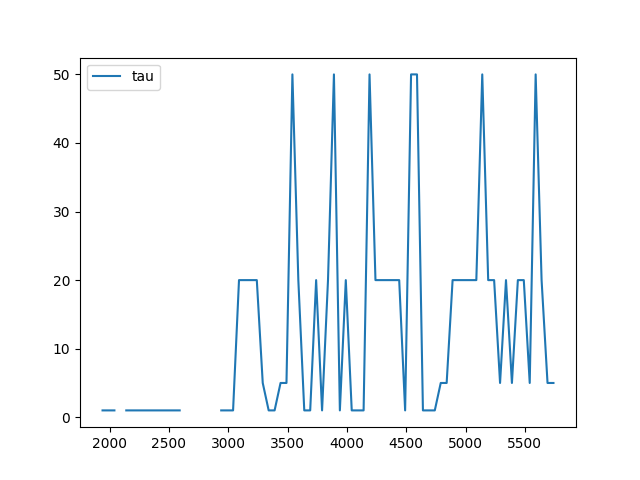

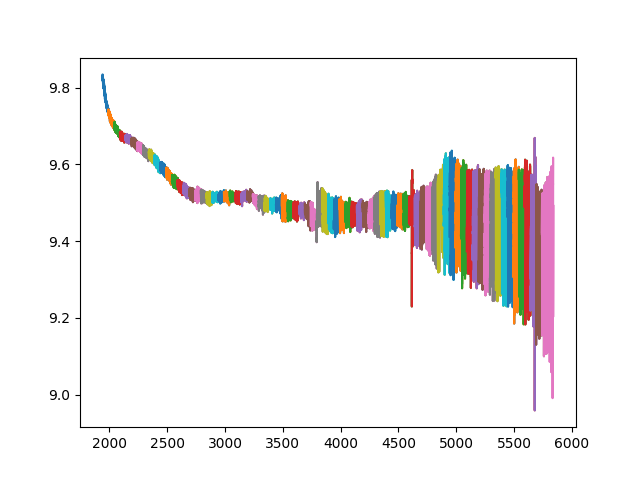

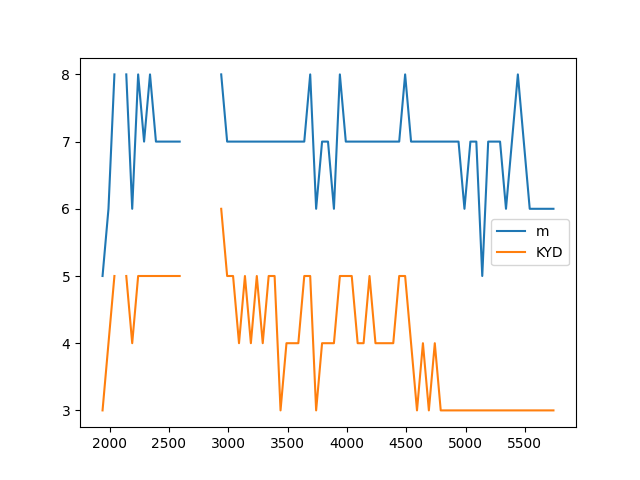

In [5]:
plt.close("all")
plt.figure()
results = []

for i, win in enumerate(wins):
    print("WINDOW ", (i+1), "/", len(wins))
    data_ = data[win[0]:win[1]]
    plt.plot(data_["TIME"], data_["SHEAR STRESS"])

    m, tau = calculate_best_m_tau(data_)
    print(f"\nBest m = {str(m)}, tau={str(tau)}")

    if ~np.isnan(m):
        LEs, KYD = calculate_lyapunov_exponents(data_, m, tau)
        print("Lyapunov Exponents:", LEs)
        print("Kaplan-Yorke dimension:", KYD)
    else:
        LEs = []
        KYD = np.nan

    results.append({ "t": data_.iloc[0].TIME, "m": m, "tau": tau, "LEs": LEs, "KYD": KYD })
    print("\n" + ("_"*20) + "\n")

df = pd.DataFrame(results)

plt.figure()
plt.plot(df["t"], df["m"], label="m")
plt.plot(df["t"], df["KYD"], label="KYD")
plt.legend()

plt.figure()
plt.plot(df["t"], df["tau"], label="tau")
plt.legend()

plt.show()